<a href="https://colab.research.google.com/github/Taofeekat/Heart-Diesease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#Loadng necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [56]:
#install pyreadstat module
!pip install pyreadstat

In [57]:
#read my csv data
HeartDiease = pd.read_csv('HeartDisease.csv')

#preview data details
HeartDiease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [58]:
#statistical column description
HeartDiease.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
gender,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
chest_pain,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
rest_bps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
cholestrol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fasting_blood_sugar,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
rest_ecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exer_angina,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
old_peak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [59]:
#check duplicates
HeartDiease.duplicated().sum()

1

In [60]:
#drop the 1 duplicate detected
HeartDiease.drop_duplicates(inplace = True)

<Axes: xlabel='target'>

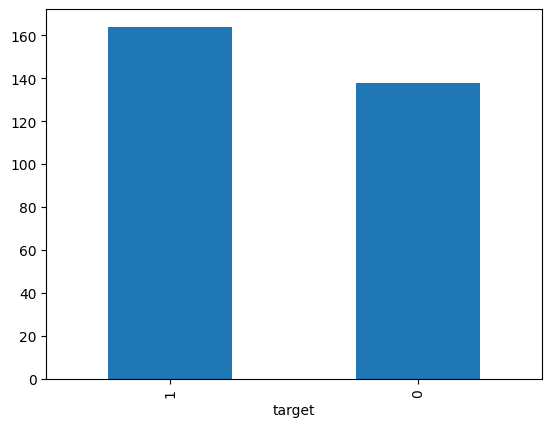

In [61]:
HeartDiease['target'].value_counts().plot(kind='bar')

In [62]:
#create additional column for eaach category
pd.get_dummies(HeartDiease['target'])

,0,1
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
298,True,False
299,True,False
300,True,False
301,True,False


In [63]:
## Get the relative frequencies of each unique value in the 'target' column
HeartDiease['target'].value_counts(normalize=True)

target
1   0.543
0   0.457
Name: proportion, dtype: float64

In [64]:
HeartDiease['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

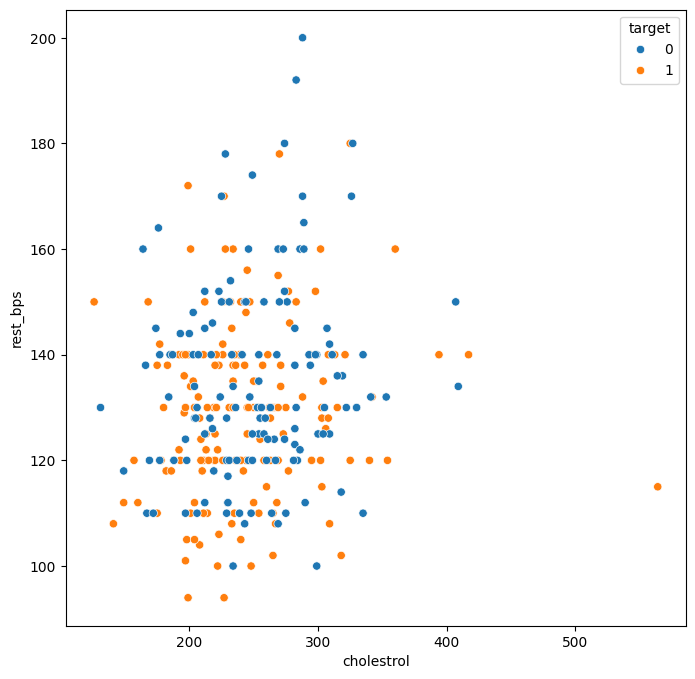

In [65]:
plt.figure(figsize=(8,8))

sns.scatterplot(data=HeartDiease, y='rest_bps', x='cholestrol', hue='target')

plt.show()

In [66]:
#splitting the feature vs target. we will use all the other columns(feature) toanalyse the target. so we will remove target and store seperately
X = HeartDiease.drop(columns='target', axis = 1) #features
Y = HeartDiease['target'] #target

In [67]:
#Splitting data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state = 2 )

In [68]:
#check your train & test distribution
print(X.shape, X_train.shape, X_test.shape)

(302, 13) (241, 13) (61, 13)


In [69]:
#Model Training - Using LOGISTIC REGRESSION model with training data
model = LogisticRegression()
#model learning
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
#evalute the model on the performance - using Accuracy score
X_train_prediction = model.predict(X_train)

training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print(f'Accuracy on Training Data: {training_data_accuracy}')
#our accuracy is 85% which is mainly because of our small dataset


Accuracy on Training Data: 0.8506224066390041


In [74]:
#test data accuracy
X_test_prediction = model.predict(X_test)

testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print(f'Accuracy on Test Data: {testing_data_accuracy}')
#Accuracy score between train and test data should be close, if not the model is overfitted

Accuracy on Test Data: 0.819672131147541


In [78]:
#Building a predictive system
input_data = np.asarray([59,1,0,110,239,0,0,142,1,1.2,1,1,3]).reshape(1,-1)

prediction = model.predict(input_data)

print(prediction)

if prediction[0]== 0:
  print('Perfectly fine')
else:
  print('Heart Diease Patient')

[0]
Perfectly fine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
